In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\Samira\Sumeyra\btk-akademi\Predictive-Analytics-and-Data-Exploration-Projects\Datasets\london_merged.csv")

In [3]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# -----------------------------
# 1. Compute the Correlation Matrix
# -----------------------------
# Identify numeric columns in the DataFrame 'data'
numeric_columns = data.select_dtypes(include=['number']).columns

# Compute and round the correlation matrix to 3 decimal places
correlation_matrix = data[numeric_columns].corr().round(3)

# -----------------------------
# 2. Reshape the Correlation Matrix to Long Format
# -----------------------------
# Reset the index and melt the correlation matrix for easier manipulation
correlation_df = correlation_matrix.reset_index().melt(
    id_vars=['index'],
    var_name='Karşılaştırılan Özellik',
    value_name='Korelasyon Değeri'
)
# Rename the index column to 'Özellikler'
correlation_df.rename(columns={'index': 'Özellikler'}, inplace=True)

# -----------------------------
# 3. Enhance the Correlation DataFrame
# -----------------------------
# Filter out self-comparisons (where a feature is compared with itself)
correlation_analysis = correlation_df.query('Özellikler != `Karşılaştırılan Özellik`').copy()

# Calculate the absolute correlation value
correlation_analysis['Mutlak_Korelasyon'] = correlation_analysis['Korelasyon Değeri'].abs()

# Create a feature pair identifier. This ensures that the pair A ↔ B is the same as B ↔ A.
condition = correlation_analysis['Özellikler'] < correlation_analysis['Karşılaştırılan Özellik']
correlation_analysis['Özellik_Çifti'] = np.where(
    condition,
    correlation_analysis['Özellikler'] + ' ↔ ' + correlation_analysis['Karşılaştırılan Özellik'],
    correlation_analysis['Karşılaştırılan Özellik'] + ' ↔ ' + correlation_analysis['Özellikler']
)

# Calculate the explained variance (in percentage) based on the correlation
correlation_analysis['Açıklanan_Varyans'] = (correlation_analysis['Korelasyon Değeri'] ** 2 * 100).round(1)

# Categorize the relationship strength based on absolute correlation
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Çok Zayıf', 'Zayıf', 'Orta', 'Güçlü', 'Çok Güçlü']
correlation_analysis['İlişki_Gücü'] = pd.cut(
    correlation_analysis['Mutlak_Korelasyon'],
    bins=bins,
    labels=labels,
    right=False
)

# -----------------------------
# 4. Select the Top 10 Unique Correlation Pairs
# -----------------------------
# Remove duplicate feature pairs, sort by the absolute correlation, and select the top 10
unique_correlations = (
    correlation_analysis
    .drop_duplicates('Özellik_Çifti')
    .sort_values('Mutlak_Korelasyon', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# -----------------------------
# 5. Display the Results with Styling
# -----------------------------
# Subset the desired columns and apply a background gradient on 'Mutlak_Korelasyon'
display(
    unique_correlations[['Özellik_Çifti', 'Korelasyon Değeri', 'Mutlak_Korelasyon', 'Açıklanan_Varyans', 'İlişki_Gücü']]
    .style
    .background_gradient(subset=['Mutlak_Korelasyon'], cmap='ocean')
    .format({
        'Korelasyon Değeri': '{:.3f}',
        'Mutlak_Korelasyon': '{:.3f}',
        'Açıklanan_Varyans': '{:.1f}%',
    })
)


,Özellik_Çifti,Korelasyon Değeri,Mutlak_Korelasyon,Açıklanan_Varyans,İlişki_Gücü
0,t1 ↔ t2,0.988,0.988,97.6%,Çok Güçlü
1,cnt ↔ hum,-0.463,0.463,21.4%,Orta
2,hum ↔ t1,-0.448,0.448,20.1%,Orta
3,hum ↔ t2,-0.403,0.403,16.2%,Orta
4,cnt ↔ t1,0.389,0.389,15.1%,Zayıf
5,cnt ↔ t2,0.369,0.369,13.6%,Zayıf
6,hum ↔ weather_code,0.335,0.335,11.2%,Zayıf
7,hum ↔ season,0.290,0.290,8.4%,Zayıf
8,hum ↔ wind_speed,-0.288,0.288,8.3%,Zayıf
9,season ↔ t1,-0.286,0.286,8.2%,Zayıf


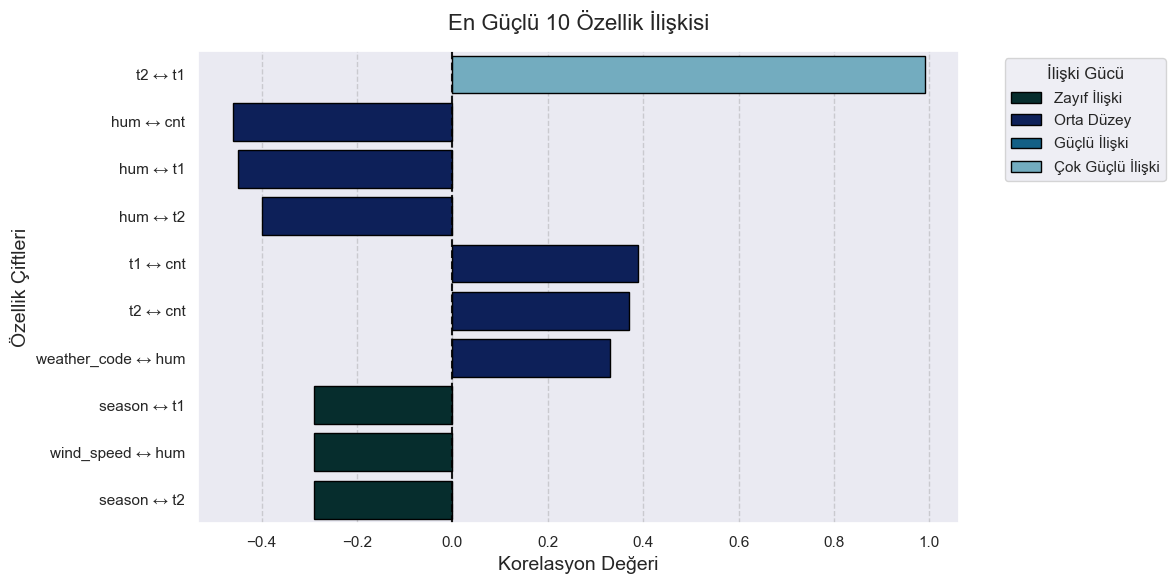

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create a barplot with the given parameters, using the ax parameter to plot on our axes
sns.barplot(
    x='Korelasyon', 
    y='Özellik_Çifti', 
    data=top_correlations, 
    hue='İlişki_Gücü', 
    palette='ocean', 
    dodge=False, 
    edgecolor='black', 
    ax=ax
)

# Add a vertical line at x=0 for reference
ax.axvline(0, color='black', linestyle='--', alpha=0.9)

# Apply a modern grid style (only horizontal grid lines)
ax.grid(axis='x', linestyle='--', alpha=0.3, color='gray')

# Set title and labels with custom padding and font sizes
ax.set_title('En Güçlü 10 Özellik İlişkisi', pad=15, fontsize=16)
ax.set_xlabel('Korelasyon Değeri', fontsize=14)
ax.set_ylabel('Özellik Çiftleri', fontsize=14)

# Optionally, adjust the legend position if needed (e.g., outside the plot area)
ax.legend(title='İlişki Gücü', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()
